# <span style="color:cyan">ΚΑΘΟΡΙΣΜΟΣ ΤΟΥ DIRECTORY ΟΠΟΥ ΒΡΙΣΚΕΤΑΙ ΤΟ ΑΡΧΕΙΟ

In [2]:
pwd #Καθορίζει το path file του αρχείου που εκτελείται

'C:\\Users\\Kosta\\Python_Projects\\JupyterProject\\SVM_ALL_DATA'

# <span style="color:cyan">ΕΙΣΑΓΩΓΗ ΤΩΝ ΑΠΑΡΑΙΤΡΗΤΩΝ ΒΙΒΛΙΟΘΗΚΩΝ ΓΙΑ ΤΗΝ ΕΚΤΕΛΕΣΗ ΤΟΥ ΚΩΔΙΚΑ

In [4]:
#Βιβλιοθήκες για την εισαγωγή και επεξεργασία των δεδομένων
import warnings
import numpy as np
import pandas as pd

#Βιβλιοθήκες για την εκτύπωση των διαγραμμάτων
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Βιβλιοθήκες για εκπαίδευση μοντέλων μηχανικής μάθησης
from sklearn.svm import SVR
from arch import arch_model
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# <span style="color:cyan">ΚΑΘΟΡΙΣΜΟΣ ΑΚΡΙΒΕΙΑΣ ΤΟΥ ΜΟΝΤΕΛΟΥ

In [5]:
#Καθορισμός ακριβείας του μοντέλου
pd.set_option("display.precision", 2)

# <span style="color:cyan">ΕΙΣΑΓΩΓΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ, ΔΗΜΙΟΥΡΓΙΑ ΤΩΝ LAGS ΚΑΙ ΚΑΙ ΤΟΥ ΚΩΔΙΚΟΥ ΧΩΡΩΝ, ΣΥΝΔΕΣΜΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

In [6]:
# Διαβάζουμε τα αρχεία και προσθέτουμε πρόθεμα για κάθε χώρα
Greece = pd.read_excel("../FINAL_DATA/Greece_Values.xlsx").add_prefix("GR_")
Italy = pd.read_excel("../FINAL_DATA/Italy_Values.xlsx").add_prefix("IT_")
Spain = pd.read_excel("../FINAL_DATA/Spain_Values.xlsx").add_prefix("ES_")
Portugal = pd.read_excel("../FINAL_DATA/Portugal_Values.xlsx").add_prefix("PT_")
Ireland = pd.read_excel("../FINAL_DATA/Ireland_Values.xlsx").add_prefix("IE_")

In [7]:
# Επαναφέρουμε τη στήλη ημερομηνίας ως κοινό σημείο συγχώνευσης
Greece.rename(columns={"GR_Date": "Date"}, inplace=True)
Italy.rename(columns={"IT_Date": "Date"}, inplace=True)
Spain.rename(columns={"ES_Date": "Date"}, inplace=True)
Portugal.rename(columns={"PT_Date": "Date"}, inplace=True)
Ireland.rename(columns={"IE_Date": "Date"}, inplace=True)

# Συγχώνευση με βάση το Date (εσωτερική τομή - common dates only)
combined_df = Greece.merge(Italy, on="Date")\
                    .merge(Spain, on="Date")\
                    .merge(Portugal, on="Date")\
                    .merge(Ireland, on="Date")

# Ταξινόμηση κατά ημερομηνία
combined_df.sort_values("Date", inplace=True)
combined_df.reset_index(drop=True, inplace=True)

# Αποθήκευση τελικού αρχείου
combined_df.to_excel("merged_dataset.xlsx", index=False)

# <span style="color:cyan">ΔΗΜΙΟΥΡΓΙΑ ΤΩΝ LAGGED VARIABLES

In [8]:
# Define the lags
lags = [7, 8, 9]

# Create lagged variables for each column (excluding 'Date')
for column in combined_df.columns:
    if column != 'Date':  # Skip the 'Date' column
        for lag in lags:
            combined_df[f"{column}_lag{lag}"] = combined_df[column].shift(lag)

# Verify the updated DataFrame
print(combined_df.head())

# Save the updated DataFrame to an Excel file
combined_df.to_excel("lagged_dataset.xlsx", index=False)

C:\Users\Kosta\AppData\Local\Temp\ipykernel_26416\2171161031.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df[f"{column}_lag{lag}"] = combined_df[column].shift(lag)
C:\Users\Kosta\AppData\Local\Temp\ipykernel_26416\2171161031.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df[f"{column}_lag{lag}"] = combined_df[column].shift(lag)
C:\Users\Kosta\AppData\Local\Temp\ipykernel_26416\2171161031.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

        Date  GR_Daily Volume of Transactions  GR_Daily Closing Prices  \
0 2013-04-30                         65289426                   974.09   
1 2013-05-02                         46208066                   983.64   
2 2013-05-08                         93343468                  1043.28   
3 2013-05-09                         94136464                  1066.29   
4 2013-05-10                         96144894                  1034.39   

   GR_20-Day Moving Average  GR_Daily Position with Bollinger Bands  \
0                    909.08                                    0.81   
1                    914.97                                    0.83   
2                    922.26                                    1.06   
3                    932.29                                    1.09   
4                    944.46                                    0.92   

   GR_Historical Volatility  GR_RSI  GR_GDP Growth  GR_Daily Returns  \
0                     30.10   72.09          -2.52      

# <span style="color:cyan">ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

In [9]:
#Επιστρέφει το σύνολο των γραμμών του αρχείου στο οποίο βρίσκονται τα δεδομένα
len(combined_df)

2586

In [10]:
#Επιστρέφει τα ονόματα των στηλών του αρχείου στο οποίο βρίσκονται τα δεδομένα
combined_df.columns

Index(['Date', 'GR_Daily Volume of Transactions', 'GR_Daily Closing Prices',
       'GR_20-Day Moving Average', 'GR_Daily Position with Bollinger Bands',
       'GR_Historical Volatility', 'GR_RSI', 'GR_GDP Growth',
       'GR_Daily Returns', 'GR_Exponential Moving Average (EMA)',
       ...
       'IE_RSI_lag9', 'IE_GDP Growth_lag7', 'IE_GDP Growth_lag8',
       'IE_GDP Growth_lag9', 'IE_Exponential Moving Average (EMA)_lag7',
       'IE_Exponential Moving Average (EMA)_lag8',
       'IE_Exponential Moving Average (EMA)_lag9',
       'IE_7- Day Standard Deviation of Daily Returns_lag7',
       'IE_7- Day Standard Deviation of Daily Returns_lag8',
       'IE_7- Day Standard Deviation of Daily Returns_lag9'],
      dtype='object', length=201)

In [11]:
# Επιστρέφει το σύνολο όλων των τιμών στο DataFrame
total_values = combined_df.size

# Aυτή η γραμμή κώδικα εκτυπώνει το συνολικό πλήθος των δεδομένων που περιέχονται στο `DataFrame`
print(f"Σύνολο δεδομένων στο DataFrame: {total_values}")

Σύνολο δεδομένων στο DataFrame: 519786


In [12]:
#Δίνει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου. To dataset αποτελείται από 11 στήλες από τις οποίες οι δέκα περιέχουν αριθμητικά δεδομένα και η μια ημερομηνία
combined_df.dtypes

Date                                                  datetime64[ns]
GR_Daily Volume of Transactions                                int64
GR_Daily Closing Prices                                      float64
GR_20-Day Moving Average                                     float64
GR_Daily Position with Bollinger Bands                       float64
                                                           ...      
IE_Exponential Moving Average (EMA)_lag8                     float64
IE_Exponential Moving Average (EMA)_lag9                     float64
IE_7- Day Standard Deviation of Daily Returns_lag7           float64
IE_7- Day Standard Deviation of Daily Returns_lag8           float64
IE_7- Day Standard Deviation of Daily Returns_lag9           float64
Length: 201, dtype: object

In [13]:
# Εκτυπώνει το όνομα των στηλών και τον τύπο των δεδομένων που περιέχουν
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Columns: 201 entries, Date to IE_7- Day Standard Deviation of Daily Returns_lag9
dtypes: datetime64[ns](1), float64(197), int64(3)
memory usage: 4.0 MB


In [14]:
#Εκτυπώνει το είδος της κάθε μεταβλητής του dataset
print(combined_df.dtypes)

Date                                                  datetime64[ns]
GR_Daily Volume of Transactions                                int64
GR_Daily Closing Prices                                      float64
GR_20-Day Moving Average                                     float64
GR_Daily Position with Bollinger Bands                       float64
                                                           ...      
IE_Exponential Moving Average (EMA)_lag8                     float64
IE_Exponential Moving Average (EMA)_lag9                     float64
IE_7- Day Standard Deviation of Daily Returns_lag7           float64
IE_7- Day Standard Deviation of Daily Returns_lag8           float64
IE_7- Day Standard Deviation of Daily Returns_lag9           float64
Length: 201, dtype: object


In [15]:
#Δίνει τον πίνακα συσχέτισης των μεταβλητών του dataset
combined_df.corr()

,Date,GR_Daily Volume of Transactions,GR_Daily Closing Prices,GR_20-Day Moving Average,GR_Daily Position with Bollinger Bands,GR_Historical Volatility,GR_RSI,GR_GDP Growth,GR_Daily Returns,GR_Exponential Moving Average (EMA),...,IE_RSI_lag9,IE_GDP Growth_lag7,IE_GDP Growth_lag8,IE_GDP Growth_lag9,IE_Exponential Moving Average (EMA)_lag7,IE_Exponential Moving Average (EMA)_lag8,IE_Exponential Moving Average (EMA)_lag9,IE_7- Day Standard Deviation of Daily Returns_lag7,IE_7- Day Standard Deviation of Daily Returns_lag8,IE_7- Day Standard Deviation of Daily Returns_lag9
Date,1.00,-4.00e-01,0.11,0.09,1.14e-01,-0.37,0.13,0.32,1.94e-02,0.10,...,-0.07,-2.16e-01,-2.15e-01,-2.14e-01,0.82,0.82,0.82,1.77e-01,1.77e-01,1.78e-01
GR_Daily Volume of Transactions,-0.40,1.00e+00,-0.18,-0.17,-6.21e-02,0.38,-0.07,-0.12,2.09e-02,-0.17,...,0.09,4.05e-01,4.06e-01,4.07e-01,-0.19,-0.19,-0.19,-5.52e-03,-3.16e-03,5.53e-04
GR_Daily Closing Prices,0.11,-1.79e-01,1.00,0.98,1.38e-01,-0.19,0.18,0.23,4.10e-02,0.99,...,0.08,-2.73e-01,-2.74e-01,-2.75e-01,0.08,0.08,0.08,-1.78e-01,-1.75e-01,-1.72e-01
GR_20-Day Moving Average,0.09,-1.67e-01,0.98,1.00,-3.62e-02,-0.14,0.02,0.23,-3.33e-02,1.00,...,0.04,-2.50e-01,-2.52e-01,-2.53e-01,0.08,0.08,0.08,-1.67e-01,-1.71e-01,-1.74e-01
GR_Daily Position with Bollinger Bands,0.11,-6.21e-02,0.14,-0.04,1.00e+00,-0.16,0.78,0.05,3.82e-01,0.02,...,0.12,-1.40e-01,-1.40e-01,-1.40e-01,0.04,0.04,0.04,-1.76e-03,1.88e-02,3.85e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IE_Exponential Moving Average (EMA)_lag8,0.82,-1.88e-01,0.08,0.08,4.12e-02,-0.38,0.07,0.47,-6.12e-04,0.08,...,-0.06,-5.48e-03,-3.15e-03,-1.68e-03,1.00,1.00,1.00,-1.82e-02,-2.45e-02,-3.01e-02
IE_Exponential Moving Average (EMA)_lag9,0.82,-1.88e-01,0.08,0.08,3.93e-02,-0.37,0.07,0.47,4.12e-04,0.08,...,-0.07,-6.79e-03,-4.46e-03,-2.13e-03,1.00,1.00,1.00,-1.15e-02,-1.78e-02,-2.42e-02
IE_7- Day Standard Deviation of Daily Returns_lag7,0.18,-5.52e-03,-0.18,-0.17,-1.76e-03,0.46,-0.16,-0.13,4.69e-02,-0.18,...,-0.31,2.72e-02,2.86e-02,2.90e-02,-0.03,-0.02,-0.01,1.00e+00,9.35e-01,8.72e-01
IE_7- Day Standard Deviation of Daily Returns_lag8,0.18,-3.16e-03,-0.17,-0.17,1.88e-02,0.45,-0.13,-0.13,5.01e-02,-0.18,...,-0.30,2.67e-02,2.68e-02,2.82e-02,-0.03,-0.02,-0.02,9.35e-01,1.00e+00,9.35e-01


# <span style="color:cyan">ΠΡΟΕΤΟΙΜΑΣΙΑ ΤΩΝ ΔΕΟΔΜΕΝΩΝ

In [16]:
# Έλεγχος για ελλείπουσες τιμές (NaN)
missing_values = combined_df.isnull().sum()

# Εμφάνιση των αποτελεσμάτων
print("Ελλείπουσες τιμές ανά στήλη:")
print(missing_values)

Ελλείπουσες τιμές ανά στήλη:
Date                                                  0
GR_Daily Volume of Transactions                       0
GR_Daily Closing Prices                               0
GR_20-Day Moving Average                              0
GR_Daily Position with Bollinger Bands                0
                                                     ..
IE_Exponential Moving Average (EMA)_lag8              8
IE_Exponential Moving Average (EMA)_lag9              9
IE_7- Day Standard Deviation of Daily Returns_lag7    7
IE_7- Day Standard Deviation of Daily Returns_lag8    8
IE_7- Day Standard Deviation of Daily Returns_lag9    9
Length: 201, dtype: int64


In [18]:
# Remove rows with NaN values
combined_df = combined_df.dropna()

# Verify the updated DataFrame
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1838 entries, 68 to 2585
Columns: 201 entries, Date to IE_7- Day Standard Deviation of Daily Returns_lag9
dtypes: datetime64[ns](1), float64(197), int64(3)
memory usage: 2.8 MB
None


In [19]:
# Ensure the 'Date' column is in datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%Y-%m-%d', errors='coerce')

# Sort the DataFrame by 'Date' in descending order
combined_df = combined_df.sort_values(by='Date', ascending=False)

# Set the 'Date' column as the index
combined_df.set_index('Date', inplace=True)

# Verify the updated DataFrame
print(combined_df.head())

            GR_Daily Volume of Transactions  GR_Daily Closing Prices  \
Date                                                                   
2023-12-29                         14325455                  1293.14   
2023-12-28                          9359690                  1285.65   
2023-12-27                         11932640                  1293.19   
2023-12-22                         17777385                  1290.89   
2023-12-21                         12093042                  1298.56   

            GR_20-Day Moving Average  GR_Daily Position with Bollinger Bands  \
Date                                                                           
2023-12-29                   1284.35                                    0.70   
2023-12-28                   1283.30                                    0.53   
2023-12-27                   1281.91                                    0.73   
2023-12-22                   1280.30                                    0.70   
2023-12-21     

In [20]:
# Save the sorted DataFrame to an Excel file
combined_df.to_excel("sorted_dataframe.xlsx", index=True)  # Set index=True to include the index in the file

# Confirmation message
print("The sorted DataFrame has been saved to 'sorted_dataframe.xlsx'.")

The sorted DataFrame has been saved to 'sorted_dataframe.xlsx'.


# <span style="color:cyan">Καθορισμός Μεταβλητών Μοντέλου SVR

In [18]:
# Define dependent variables (targets) for each country
targets = {'Greece': 'GR_Daily Closing Prices','Italy': 'IT_Daily Closing Prices', 'Spain':'ES_Daily Closing Prices','Portugal': 'PT_Daily Closing Prices','Ireland': 'IE_Daily Closing Prices'}

In [19]:
# Keep only columns containing "lag" (independent variables)
lagged_columns = [col for col in combined_df.columns if 'lag' in col]
X = combined_df[lagged_columns]

In [20]:
# Dependent variable y
y = targets

# <span style="color:cyan">Διαχωρισμος σε train (80%) - test (20%) split, Κανονικοποίηση Δεδομένων και Δημιουργία του μοντέλου SVR, Υλοποίηση του μοντέλου SVR

In [21]:
# Initialize a dictionary to store results
results = {}

# Loop through each country and its target variable
for country, target in targets.items():
    print(f"\n🔹 Prediction for: {country}")

    # Define the dependent variable (y) for the current country
    y = combined_df[target]

    # Remove rows with NaN values
    X_clean = X.dropna()
    y = y.loc[X_clean.index]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.1, random_state=42)

    # Normalize the independent variables
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the SVR model
    svr = SVR(kernel="linear", C=1.0)
    svr.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = svr.predict(X_train_scaled)
    y_test_pred = svr.predict(X_test_scaled)

    # Evaluate the model
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store results
    results[country] = {
        "RMSE Train": rmse_train,
        "RMSE Test": rmse_test,
        "R² Train": r2_train,
        "R² Test": r2_test
    }

    # Print results for the current country
    print(f"📉 RMSE Train: {rmse_train:.4f}, RMSE Test: {rmse_test:.4f}")
    print(f"📈 R² Train: {r2_train:.4f}, R² Test: {r2_test:.4f}")

# Optionally, save the results to an Excel file
results_df = pd.DataFrame(results).T
results_df.to_excel("svr_results_by_country.xlsx", index=True)


🔹 Prediction for: Greece
📉 RMSE Train: 37.3741, RMSE Test: 37.9859
📈 R² Train: 0.9665, R² Test: 0.9592

🔹 Prediction for: Italy
📉 RMSE Train: 778.4374, RMSE Test: 759.1939
📈 R² Train: 0.9386, R² Test: 0.9380

🔹 Prediction for: Spain
📉 RMSE Train: 281.3815, RMSE Test: 271.3680
📈 R² Train: 0.9214, R² Test: 0.9102

🔹 Prediction for: Portugal
📉 RMSE Train: 170.4833, RMSE Test: 163.0331
📈 R² Train: 0.9457, R² Test: 0.9394

🔹 Prediction for: Ireland
📉 RMSE Train: 225.0155, RMSE Test: 215.5113
📈 R² Train: 0.9696, R² Test: 0.9725


# <span style="color:cyan">Οπτικοποίηση Αποτελεσμάτων


🔹 Plotting results for: Greece


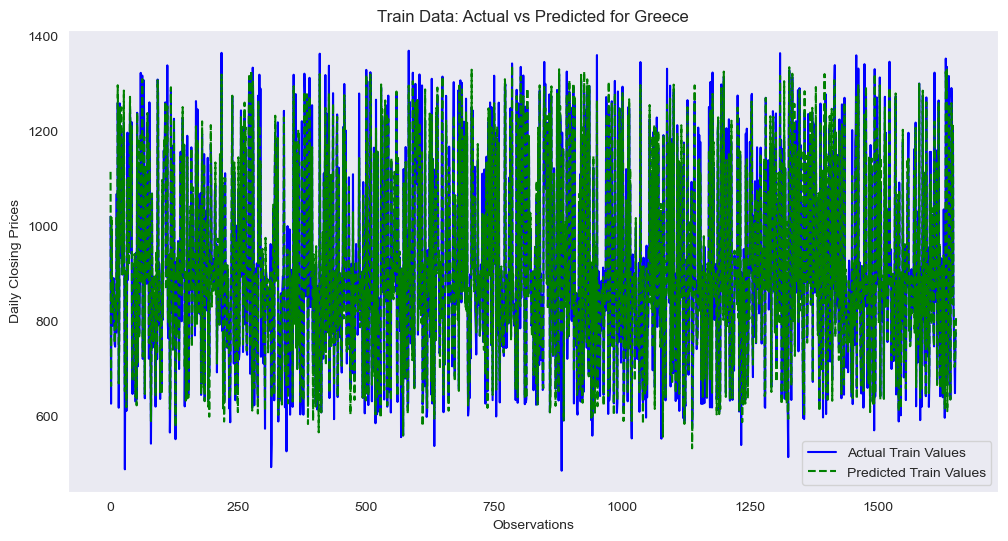

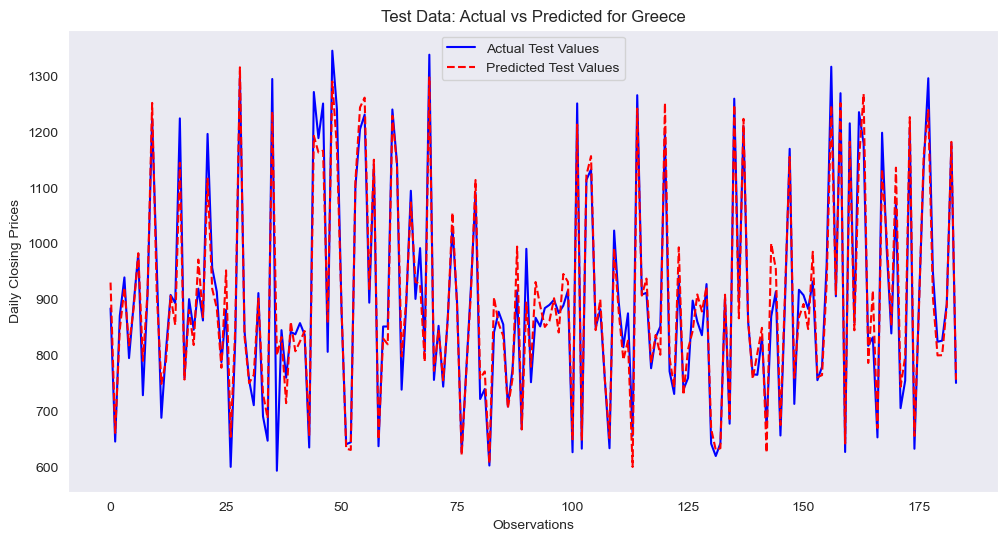


🔹 Plotting results for: Italy


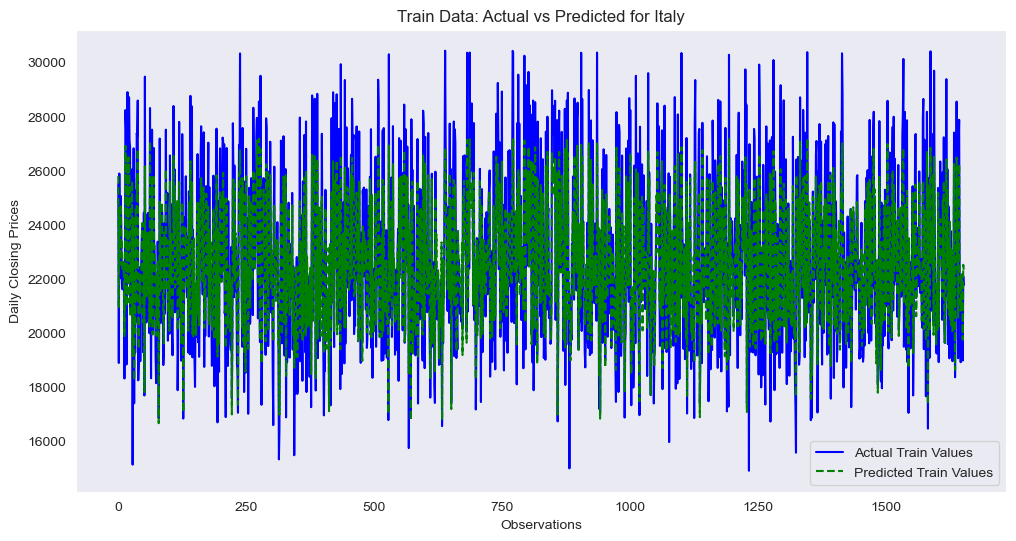

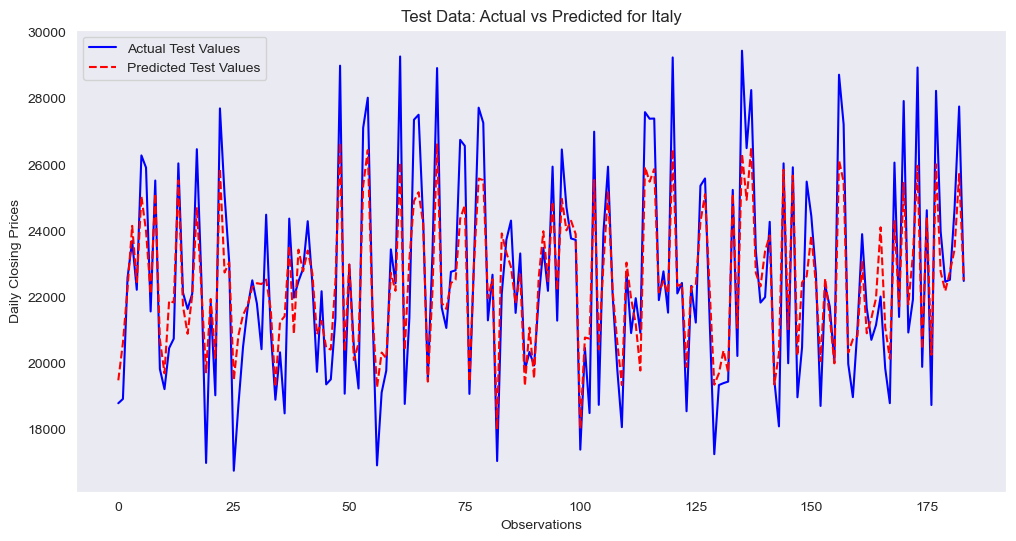


🔹 Plotting results for: Spain


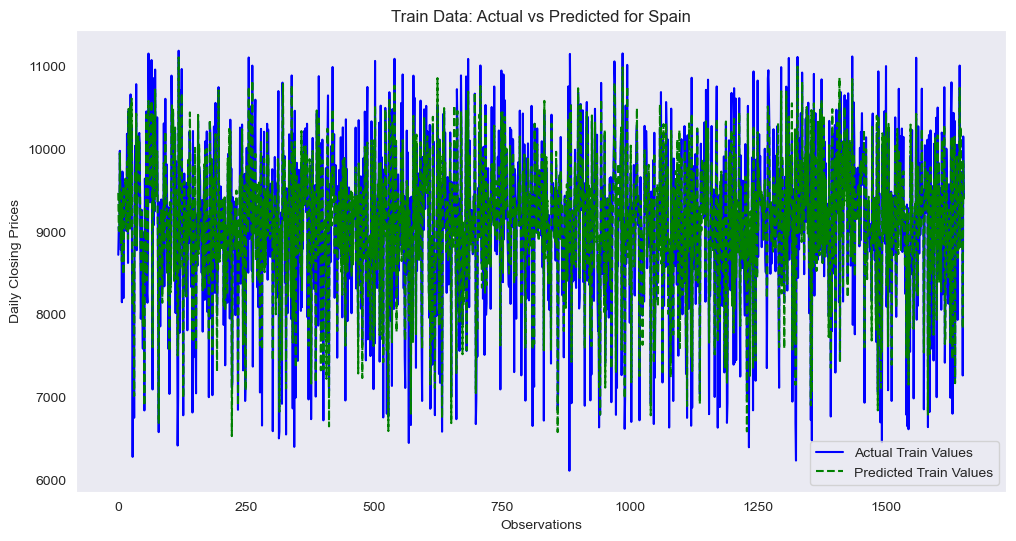

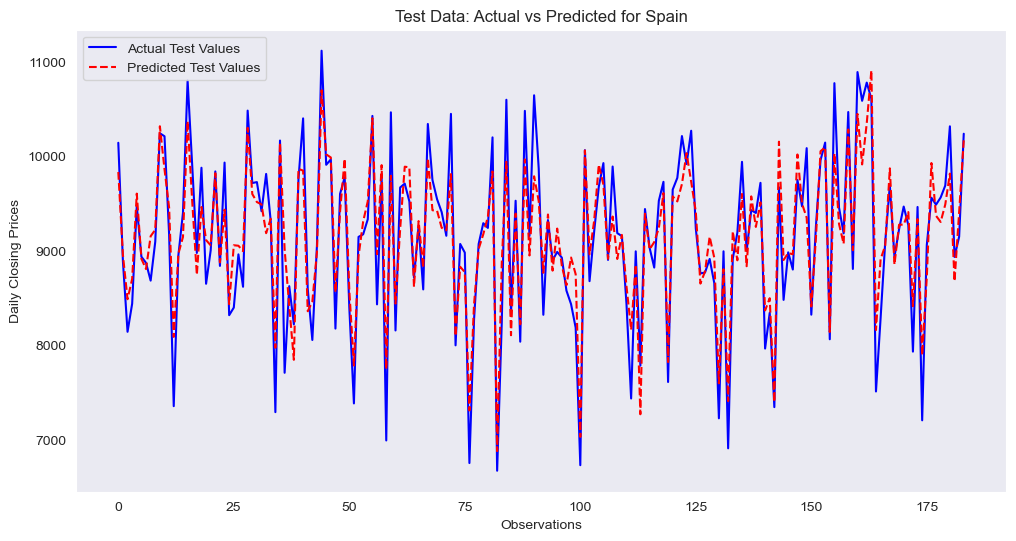


🔹 Plotting results for: Portugal


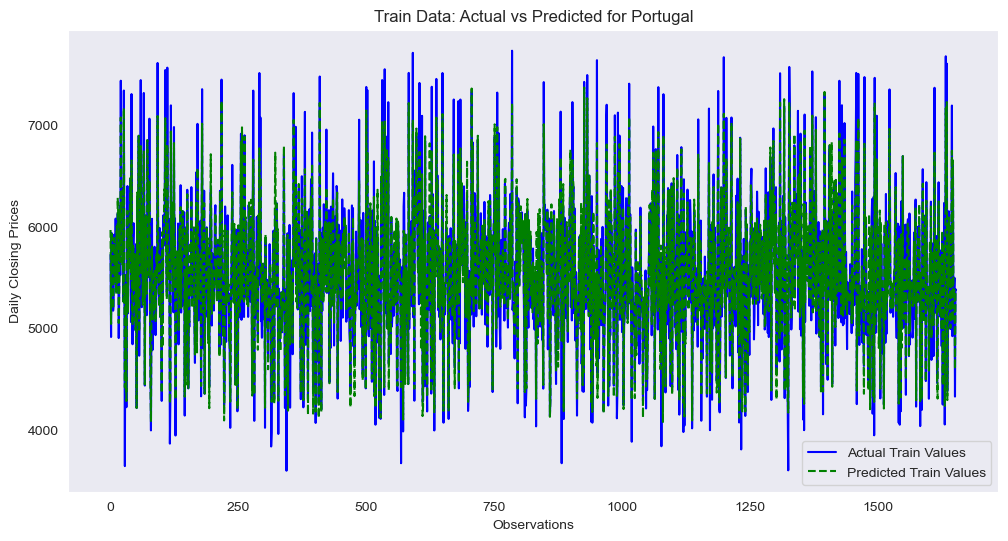

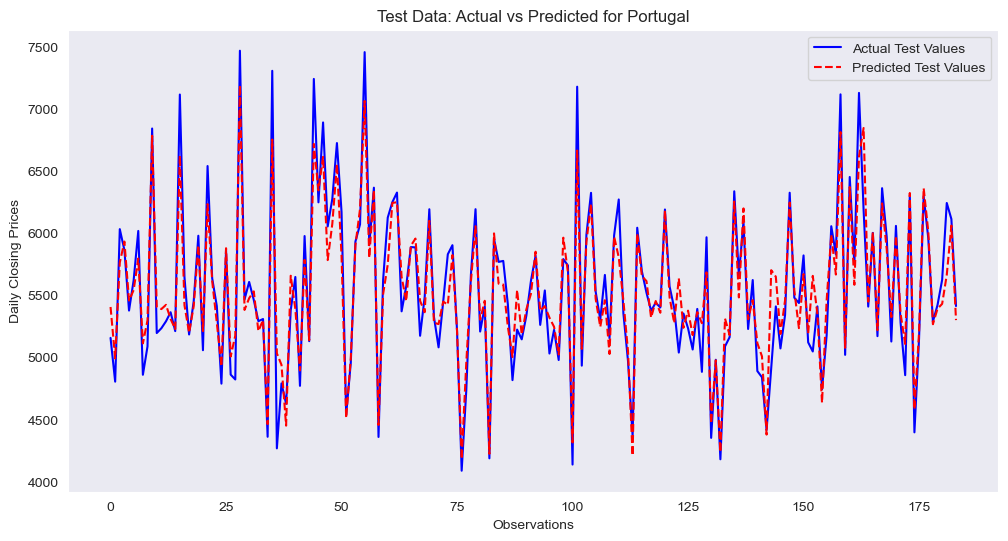


🔹 Plotting results for: Ireland


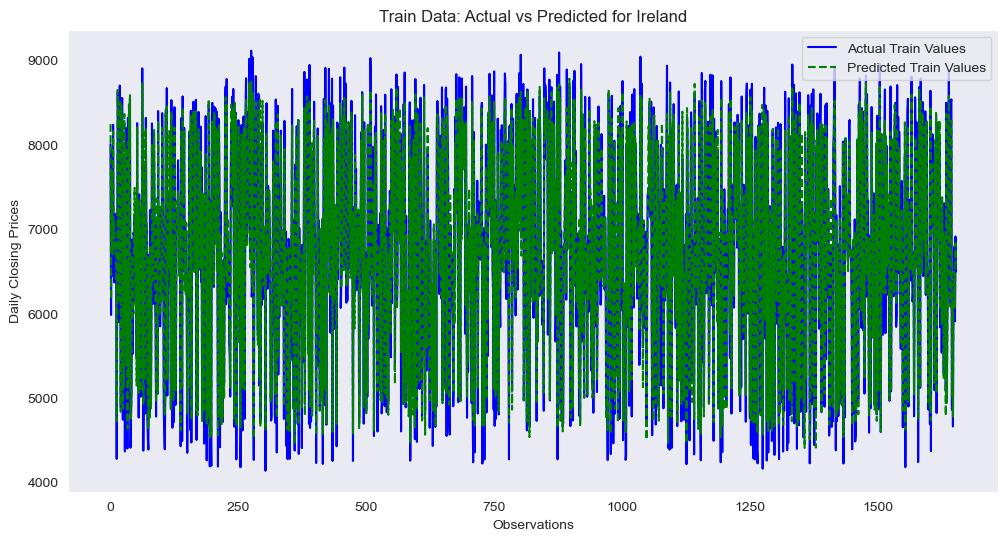

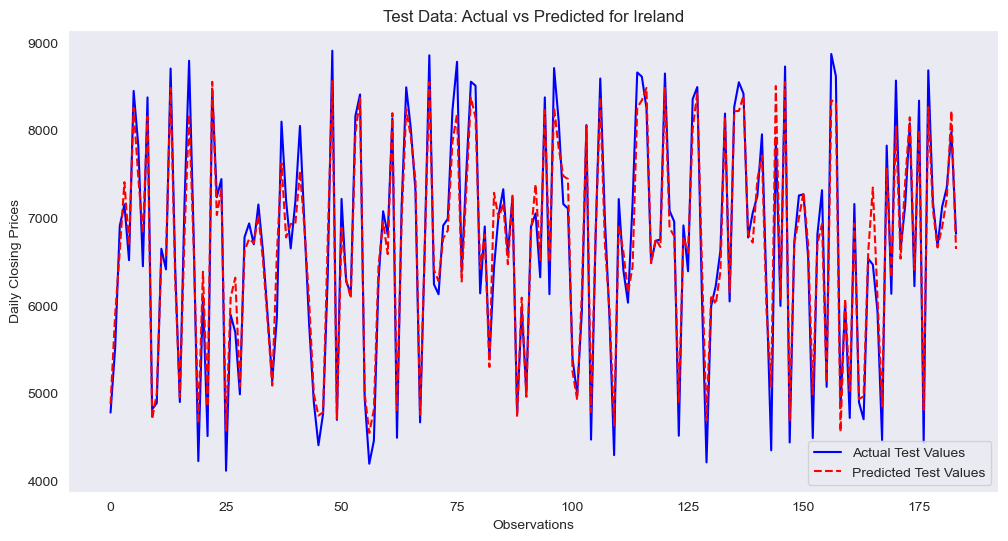

In [22]:
# Loop through each country and its target variable
for country, target in targets.items():
    print(f"\n🔹 Plotting results for: {country}")

    # Define the dependent variable (y) for the current country
    y = combined_df[target]

    # Remove rows with NaN values
    X_clean = X.dropna()
    y = y.loc[X_clean.index]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.1, random_state=42)

    # Normalize the independent variables
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the SVR model
    svr = SVR(kernel="linear", C=0.1)
    svr.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = svr.predict(X_train_scaled)
    y_test_pred = svr.predict(X_test_scaled)

    # Plot for training data
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.values, label="Actual Train Values", color="blue", linewidth=1.5)
    plt.plot(y_train_pred, label="Predicted Train Values", color="green", linestyle="--", linewidth=1.5)
    plt.title(f"Train Data: Actual vs Predicted for {country}")
    plt.xlabel("Observations")
    plt.ylabel("Daily Closing Prices")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot for testing data
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label="Actual Test Values", color="blue", linewidth=1.5)
    plt.plot(y_test_pred, label="Predicted Test Values", color="red", linestyle="--", linewidth=1.5)
    plt.title(f"Test Data: Actual vs Predicted for {country}")
    plt.xlabel("Observations")
    plt.ylabel("Daily Closing Prices")
    plt.legend()
    plt.grid()
    plt.show()

In [23]:
# Initialize an empty DataFrame to store results for all countries
export_df = pd.DataFrame()

# Loop through each country and its target variable
for country, target in targets.items():
    print(f"Processing: {country}")

    # Define the dependent variable (y) for the current country
    y = combined_df[target]

    # Remove rows with NaN values
    X_clean = X.dropna()
    y = y.loc[X_clean.index]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.1, random_state=42)

    # Normalize the independent variables
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the SVR model
    svr = SVR(kernel="linear", C=1.0)
    svr.fit(X_train_scaled, y_train)

    # Make predictions for the test set
    y_test_pred = svr.predict(X_test_scaled)

    # Create a DataFrame for the current country
    country_df = pd.DataFrame({
        "Country": country,
        "Actual Values": y_test.values,
        "Predicted Values": y_test_pred
    })

    # Append to the combined DataFrame
    export_df = pd.concat([export_df, country_df], ignore_index=True)

# Export the combined DataFrame to an Excel file
export_df.to_excel("test_set_actual_vs_predicted.xlsx", index=False)

print("Export completed: 'test_set_actual_vs_predicted.xlsx'")

Processing: Greece
Processing: Italy
Processing: Spain
Processing: Portugal
Processing: Ireland
Export completed: 'test_set_actual_vs_predicted.xlsx'


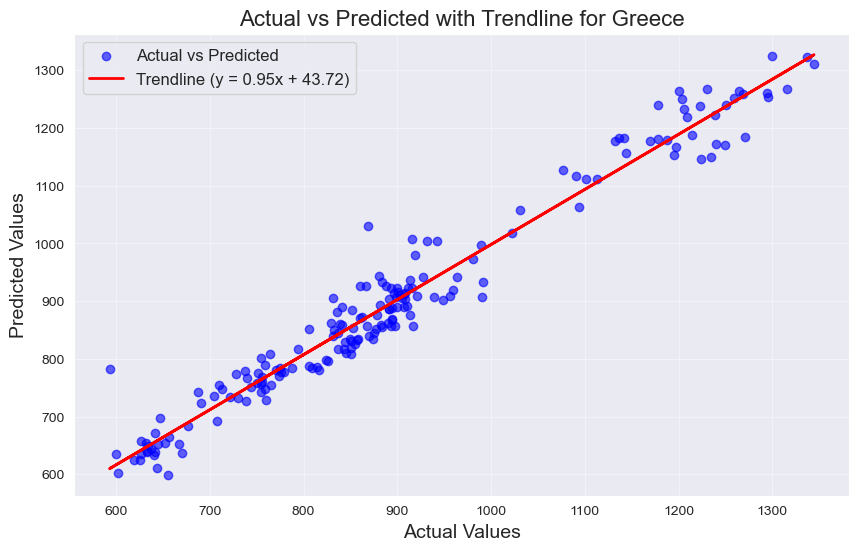

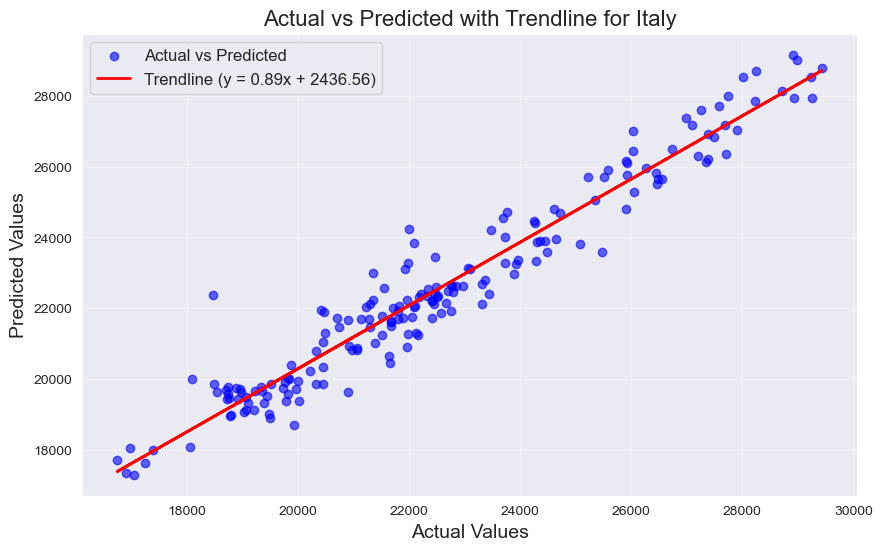

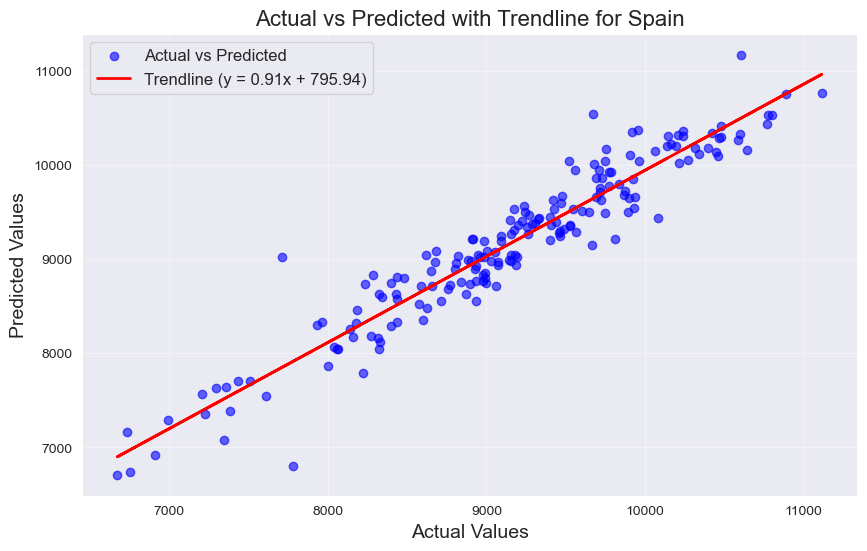

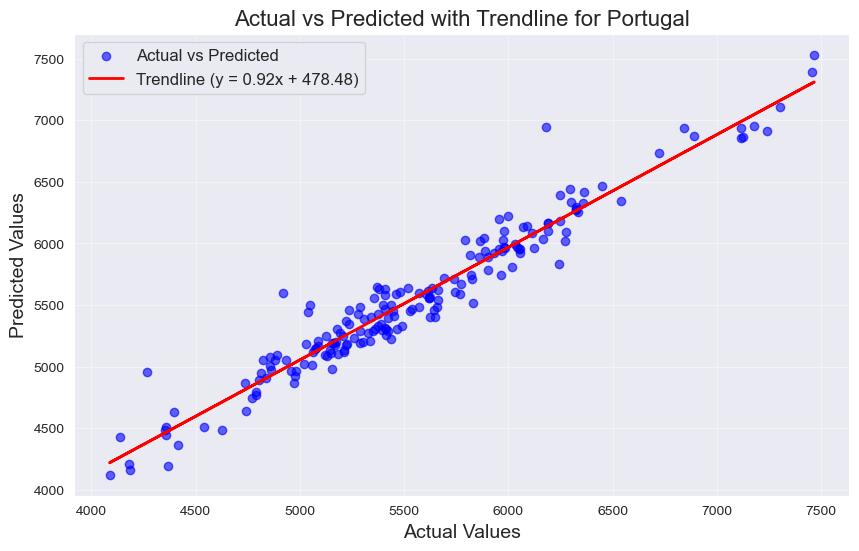

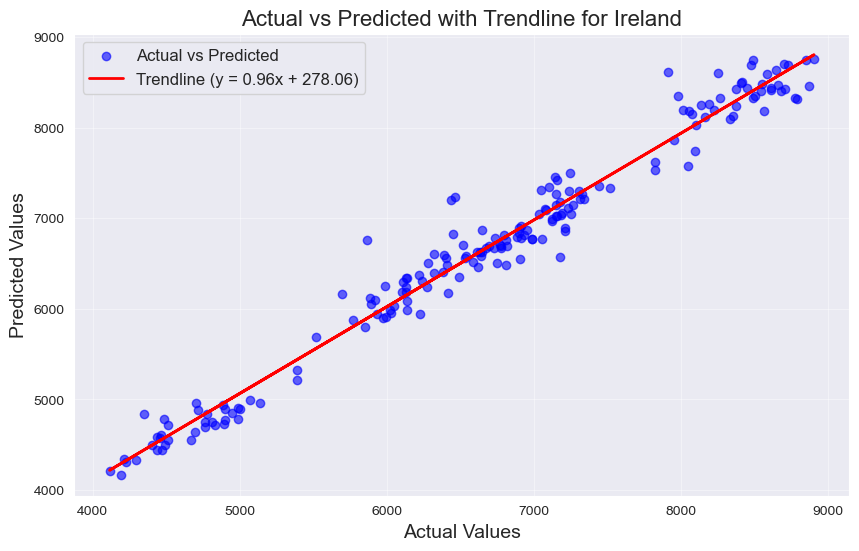

In [24]:
# Load the Excel file
data = pd.read_excel("test_set_actual_vs_predicted.xlsx")

# Loop through each country
for country in data["Country"].unique():
    # Filter data for the current country
    country_data = data[data["Country"] == country]
    actual = country_data["Actual Values"].values
    predicted = country_data["Predicted Values"].values

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(actual.reshape(-1, 1), predicted)
    trendline = model.predict(actual.reshape(-1, 1))

    # Plot actual vs predicted values with the trendline
    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predicted, label="Actual vs Predicted", color="blue", alpha=0.6)
    plt.plot(actual, trendline, label=f"Trendline (y = {model.coef_[0]:.2f}x + {model.intercept_:.2f})", color="red", linewidth=2)
    plt.title(f"Actual vs Predicted with Trendline for {country}", fontsize=16)
    plt.xlabel("Actual Values", fontsize=14)
    plt.ylabel("Predicted Values", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.4)
    plt.show()